In [1]:
from pyautoml import Clean, Preprocess, Feature
import pandas as pd

train_data = pd.read_csv('data/train.csv') 

Loading BokehJS ...

In [2]:
clean = Clean(data=train_data, target_field='Survived', report_name='Titanic')

## Cleaning

In [3]:
clean.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,712,712,712,NaN,NaN,570,712,712,NaN,712,NaN,NaN
mean,449.399,0.376404,2.30899,NaN,NaN,29.5271,0.48736,0.373596,NaN,32.0311,NaN,NaN
std,258.957,0.484824,0.83861,NaN,NaN,14.333,1.03245,0.813583,NaN,51.3635,NaN,NaN
min,1,0,1,NaN,NaN,0.42,0,0,NaN,0,NaN,NaN
25%,221.75,0,2,NaN,NaN,20,0,0,NaN,7.8958,NaN,NaN
50%,449.5,0,3,NaN,NaN,28,0,0,NaN,14.4,NaN,NaN
75%,675.25,1,3,NaN,NaN,38,1,0,NaN,30.5,NaN,NaN
max,891,1,3,NaN,NaN,80,8,6,NaN,512.329,NaN,NaN
counts,712,712,712,712,712,570,712,712,712,712,165,711
uniques,712,2,3,712,2,81,7,7,571,230,127,3


In [4]:
clean.column_info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
counts,712,712,712,712,712,570,712,712,712,712,165,711
uniques,712,2,3,712,2,81,7,7,571,230,127,3
missing,0,0,0,0,0,142,0,0,0,0,547,1
missing_perc,0%,0%,0%,0%,0%,19.94%,0%,0%,0%,0%,76.83%,0.14%
types,numeric,bool,numeric,unique,bool,numeric,numeric,numeric,categorical,numeric,categorical,categorical


mean                        32.0311
std                         51.3635
variance                     2638.2
min                               0
max                         512.329
mode                             13
5%                            7.225
25%                          7.8958
50%                            14.4
75%                            30.5
95%                         110.883
iqr                         22.6042
kurtosis                     35.516
skewness                    5.02503
sum                         22806.1
mad                         28.1752
cv                          1.60355
zeros_num                        10
zeros_perc                    1.40%
deviating_of_mean                17
deviating_of_mean_perc        2.39%
deviating_of_median              42
deviating_of_median_perc      5.90%
top_correlations                   
counts                          712
uniques                         230
missing                           0
missing_perc                

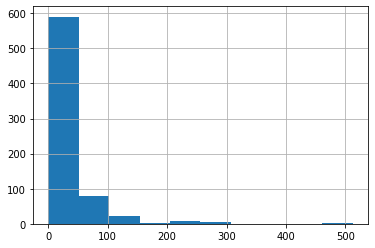

In [5]:
clean.describe_column('Fare')

32.031079213483146

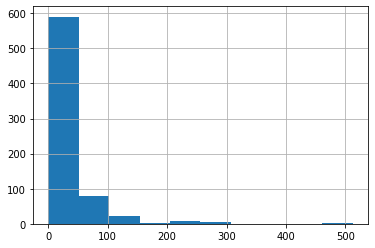

In [6]:
clean.describe_column('Fare')['mean']

In [7]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,547.000000,142.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.768258,0.199438,0.001404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,140.000000,35.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.782123,0.195531,0.005587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
iter1 = clean.replace_missing_mostcommon('Fare', 'Embarked')

In [9]:
iter1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,NaN,27.7208,C
1,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,NaN,7.75,Q
2,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,NaN,31,S
3,442,0,3,"Hampe, Mr. Leon",male,20.0,0,0,345769,NaN,9.5,S
4,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,NaN,8.05,S
5,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,NaN,16.1,S
6,763,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,NaN,7.2292,C
7,349,1,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,NaN,15.9,S
8,122,0,3,"Moore, Mr. Leonard Charles",male,NaN,0,0,A4. 54510,NaN,8.05,S
9,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,NaN,18.7875,C


In [10]:
iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,547.000000,142.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.768258,0.199438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,140.000000,35.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.782123,0.195531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


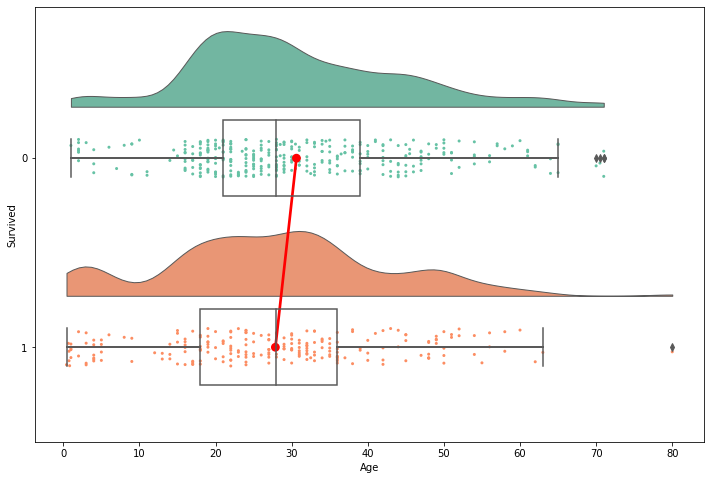

In [11]:
clean.visualize_raincloud('Age')

In [12]:
clean.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,547.000000,142.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.768258,0.199438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,140.000000,35.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.782123,0.195531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
clean.replace_missing_random_discrete('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Fare,Embarked
0,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,NaN,27.7208,C
1,48,1,3,"O'Driscoll, Miss. Bridget",female,40.0,0,0,14311,NaN,7.75,Q
2,271,0,1,"Cairns, Mr. Alexander",male,29.0,0,0,113798,NaN,31,S
3,442,0,3,"Hampe, Mr. Leon",male,20.0,0,0,345769,NaN,9.5,S
4,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,NaN,8.05,S
5,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,NaN,16.1,S
6,763,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,NaN,7.2292,C
7,349,1,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,NaN,15.9,S
8,122,0,3,"Moore, Mr. Leonard Charles",male,41.0,0,0,A4. 54510,NaN,8.05,S
9,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,NaN,18.7875,C


In [14]:
clean.missing_values

,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,547.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.768258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Embarked,Fare,Ticket,Parch,SibSp,Age,Sex,Name,Pclass,Survived,PassengerId
Total,140.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.782123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
## Proving iter1 is a completely separate instance

iter1.missing_values

,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,547.000000,142.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.768258,0.199438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Cabin,Age,Embarked,Fare,Ticket,Parch,SibSp,Sex,Name,Pclass,Survived,PassengerId
Total,140.000000,35.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.782123,0.195531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
clean.visualize_barplot('Age', 'Survived', groupby='Age', method='mean')

In [17]:
clean.drop('Cabin')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,C
1,48,1,3,"O'Driscoll, Miss. Bridget",female,40.0,0,0,14311,7.75,Q
2,271,0,1,"Cairns, Mr. Alexander",male,29.0,0,0,113798,31,S
3,442,0,3,"Hampe, Mr. Leon",male,20.0,0,0,345769,9.5,S
4,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.05,S
5,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1,S
6,763,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,C
7,349,1,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,15.9,S
8,122,0,3,"Moore, Mr. Leonard Charles",male,41.0,0,0,A4. 54510,8.05,S
9,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,C


## Feature Engineering

In [18]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Nobel",
                    "Don":        "Nobel",
                    "Sir" :       "Nobel",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Nobel",
                    "Dona":       "Nobel",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Nobel"
                    } 

feature = Feature(clean)

In [19]:
feature.apply(lambda x: Title_Dictionary[x['Name'].split(',')[1].split('.')[0].strip()], 'Title')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,C,Mr
1,48,1,3,"O'Driscoll, Miss. Bridget",female,40.0,0,0,14311,7.75,Q,Miss
2,271,0,1,"Cairns, Mr. Alexander",male,29.0,0,0,113798,31,S,Mr
3,442,0,3,"Hampe, Mr. Leon",male,20.0,0,0,345769,9.5,S,Mr
4,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.05,S,Mr
5,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1,S,Mr
6,763,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,C,Mr
7,349,1,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,15.9,S,Master
8,122,0,3,"Moore, Mr. Leonard Charles",male,41.0,0,0,A4. 54510,8.05,S,Mr
9,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,C,Mr


In [20]:
feature['FamilySize'] = ( feature['SibSp'] + feature['Parch'],
                         feature.test_data['SibSp'] + feature.test_data['SibSp'] )

In [21]:
feature

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize
0,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,C,Mr,1
1,48,1,3,"O'Driscoll, Miss. Bridget",female,40.0,0,0,14311,7.75,Q,Miss,0
2,271,0,1,"Cairns, Mr. Alexander",male,29.0,0,0,113798,31,S,Mr,0
3,442,0,3,"Hampe, Mr. Leon",male,20.0,0,0,345769,9.5,S,Mr,0
4,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.05,S,Mr,0
5,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1,S,Mr,0
6,763,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,C,Mr,0
7,349,1,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,15.9,S,Master,2
8,122,0,3,"Moore, Mr. Leonard Charles",male,41.0,0,0,A4. 54510,8.05,S,Mr,0
9,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,C,Mr,0


In [22]:
## Can still do apply and it will apply to both train and test dataset.

def get_person(passenger):
    age = passenger['Age']
    sex = passenger['Sex']
    return 'child' if age < 16 else sex

feature.apply(get_person, 'Person')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,C,Mr,1,male
1,48,1,3,"O'Driscoll, Miss. Bridget",female,40.0,0,0,14311,7.75,Q,Miss,0,female
2,271,0,1,"Cairns, Mr. Alexander",male,29.0,0,0,113798,31,S,Mr,0,male
3,442,0,3,"Hampe, Mr. Leon",male,20.0,0,0,345769,9.5,S,Mr,0,male
4,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.05,S,Mr,0,male
5,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1,S,Mr,0,male
6,763,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,C,Mr,0,male
7,349,1,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,15.9,S,Master,2,child
8,122,0,3,"Moore, Mr. Leonard Charles",male,41.0,0,0,A4. 54510,8.05,S,Mr,0,male
9,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,C,Mr,0,child


In [23]:
## Can still do lambda.

feature.apply(lambda x: 'child' if x['Age'] < 16 else x['Sex'], 'Person')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,Person
0,362,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,SC/PARIS 2167,27.7208,C,Mr,1,male
1,48,1,3,"O'Driscoll, Miss. Bridget",female,40.0,0,0,14311,7.75,Q,Miss,0,female
2,271,0,1,"Cairns, Mr. Alexander",male,29.0,0,0,113798,31,S,Mr,0,male
3,442,0,3,"Hampe, Mr. Leon",male,20.0,0,0,345769,9.5,S,Mr,0,male
4,615,0,3,"Brocklebank, Mr. William Alfred",male,35.0,0,0,364512,8.05,S,Mr,0,male
5,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1,S,Mr,0,male
6,763,1,3,"Barah, Mr. Hanna Assi",male,20.0,0,0,2663,7.2292,C,Mr,0,male
7,349,1,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,15.9,S,Master,2,child
8,122,0,3,"Moore, Mr. Leonard Charles",male,41.0,0,0,A4. 54510,8.05,S,Mr,0,male
9,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,C,Mr,0,child


In [24]:
feature.drop('Name', 'Ticket', 'SibSp', 'Parch', 'Sex')

,PassengerId,Survived,Pclass,Age,Fare,Embarked,Title,FamilySize,Person
0,362,0,2,29.0,27.7208,C,Mr,1,male
1,48,1,3,40.0,7.75,Q,Miss,0,female
2,271,0,1,29.0,31,S,Mr,0,male
3,442,0,3,20.0,9.5,S,Mr,0,male
4,615,0,3,35.0,8.05,S,Mr,0,male
5,625,0,3,21.0,16.1,S,Mr,0,male
6,763,1,3,20.0,7.2292,C,Mr,0,male
7,349,1,3,3.0,15.9,S,Master,2,child
8,122,0,3,41.0,8.05,S,Mr,0,male
9,732,0,3,11.0,18.7875,C,Mr,0,child


In [25]:
feature.onehot_encode('Person', 'Embarked', 'Title', 'Pclass')

,PassengerId,Survived,Age,Fare,FamilySize,Person_child,Person_female,Person_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Nobel,Title_Officer,Pclass_1,Pclass_2,Pclass_3
0,362,0,29.0,27.7208,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,48,1,40.0,7.75,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,271,0,29.0,31,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,442,0,20.0,9.5,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,615,0,35.0,8.05,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5,625,0,21.0,16.1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
6,763,1,20.0,7.2292,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7,349,1,3.0,15.9,2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,122,0,41.0,8.05,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,732,0,11.0,18.7875,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Modelling